# Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
# Download Indonesian stopwords if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("reviews.csv")

In [ ]:
df.head()

,Tanggal,Rating,Review
0,4 hours ago,5,ngabisin 2 botol serum ini dan cerahnya sangat...
1,6 days ago,1,gasuka! lengket bangettt dan gaenak. cekat cek...
2,20 Jan 2025,5,Best product and always purchase ❤️
3,18 Jan 2025,5,Sudah sering pakai tapi belum ada perubahan si...
4,18 Jan 2025,5,"Suka banget sama serum satu ini, karena bikin ..."


In [ ]:
# Function to categorize ratings
def categorize_rating(rating):
    if rating in [1, 2]:
        return "Kecewa"
    elif rating == 3:
        return "Netral"
    else:  # rating 4 or 5
        return "Puas"

# Apply the function to transform the rating column
df["Kategori"] = df["Rating"].apply(categorize_rating)

# Group data by rating category
kecewa_reviews = df[df["Kategori"] == "Kecewa"]
netral_reviews = df[df["Kategori"] == "Netral"]
puas_reviews = df[df["Kategori"] == "Puas"]

In [ ]:
# Display the first few rows for each category
print("\n=== Reviews: Kecewa ===")
display(kecewa_reviews.head())

print("\n=== Reviews: Netral ===")
display(netral_reviews.head())

print("\n=== Reviews: Puas ===")
display(puas_reviews.head())


=== Reviews: Kecewa ===


,Tanggal,Rating,Review,Kategori
1,6 days ago,1,gasuka! lengket bangettt dan gaenak. cekat cek...,Kecewa
58,06 Dec 2024,2,Serum ini menurut kubterlalu besar kandungan n...,Kecewa



=== Reviews: Netral ===


,Tanggal,Rating,Review,Kategori
88,21 Nov 2024,3,"Tekstur serum ini cair, mudah meresap dan ring...",Netral



=== Reviews: Puas ===


,Tanggal,Rating,Review,Kategori
0,4 hours ago,5,ngabisin 2 botol serum ini dan cerahnya sangat...,Puas
2,20 Jan 2025,5,Best product and always purchase ❤️,Puas
3,18 Jan 2025,5,Sudah sering pakai tapi belum ada perubahan si...,Puas
4,18 Jan 2025,5,"Suka banget sama serum satu ini, karena bikin ...",Puas
5,16 Jan 2025,5,Honest review dari aku ini mantul banget buat ...,Puas


<ipython-input-7-0956c6a2e435>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Rating"], palette="coolwarm", edgecolor="black")


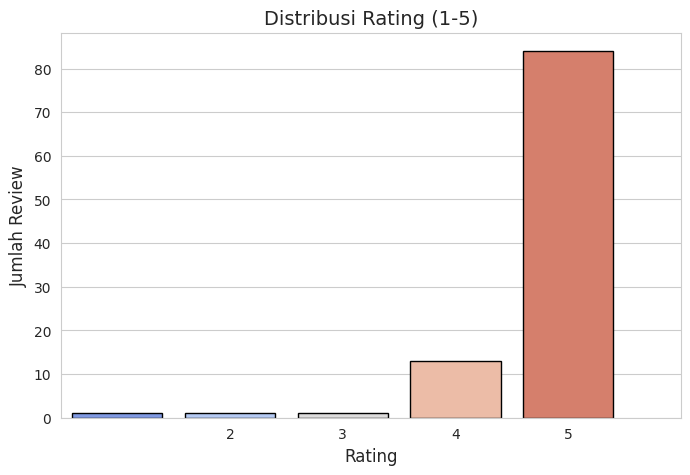

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

### 📊 Bar Chart: Distribution of Ratings (1-5)
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Rating"], palette="coolwarm", edgecolor="black")

plt.title("Distribusi Rating (1-5)", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah Review", fontsize=12)
plt.xticks([1, 2, 3, 4, 5])  # Ensure x-axis shows ratings 1-5

plt.show()

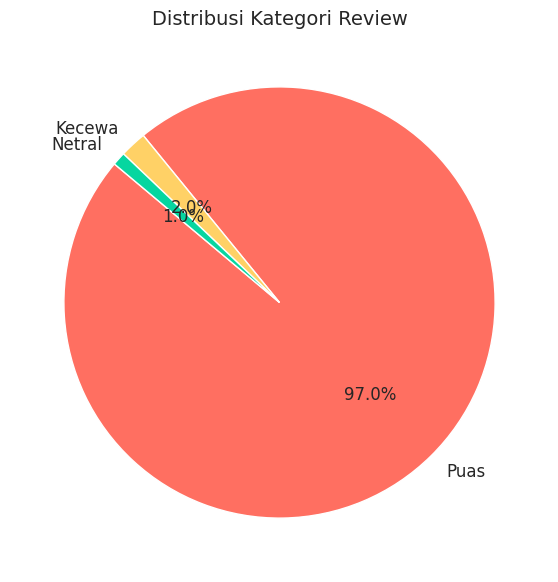

In [ ]:
### 🥧 Pie Chart: Distribution of Categories (Kecewa, Netral, Puas)
plt.figure(figsize=(7, 7))
category_counts = df["Kategori"].value_counts()  # Count each category
colors = ["#FF6F61", "#FFD166", "#06D6A0"]  # Custom colors

plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%",
        colors=colors, startangle=140, textprops={"fontsize": 12})

plt.title("Distribusi Kategori Review", fontsize=14)
plt.show()

In [ ]:
# Save grouped data to separate CSV files
kecewa_reviews.to_csv("reviews_kecewa.csv", index=False)
netral_reviews.to_csv("reviews_netral.csv", index=False)
puas_reviews.to_csv("reviews_puas.csv", index=False)

In [ ]:
# Load Indonesian stopwords
indonesian_stopwords = set(stopwords.words('indonesian'))

# Function to preprocess text by removing stopwords, punctuation, and digits
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and digits
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in indonesian_stopwords])

    return text

In [ ]:
# Function to generate WordCloud from review text
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

In [ ]:
# Load each categorized CSV file
kecewa_df = pd.read_csv("reviews_kecewa.csv")
netral_df = pd.read_csv("reviews_netral.csv")
puas_df = pd.read_csv("reviews_puas.csv")

In [ ]:
# Preprocess each review by applying the preprocess_text function
kecewa_df["Processed_Review"] = kecewa_df["Review"].fillna("").astype(str).apply(preprocess_text)
netral_df["Processed_Review"] = netral_df["Review"].fillna("").astype(str).apply(preprocess_text)
puas_df["Processed_Review"] = puas_df["Review"].fillna("").astype(str).apply(preprocess_text)

In [ ]:
# Combine processed reviews for WordCloud generation
kecewa_text = " ".join(kecewa_df["Processed_Review"])
netral_text = " ".join(netral_df["Processed_Review"])
puas_text = " ".join(puas_df["Processed_Review"])

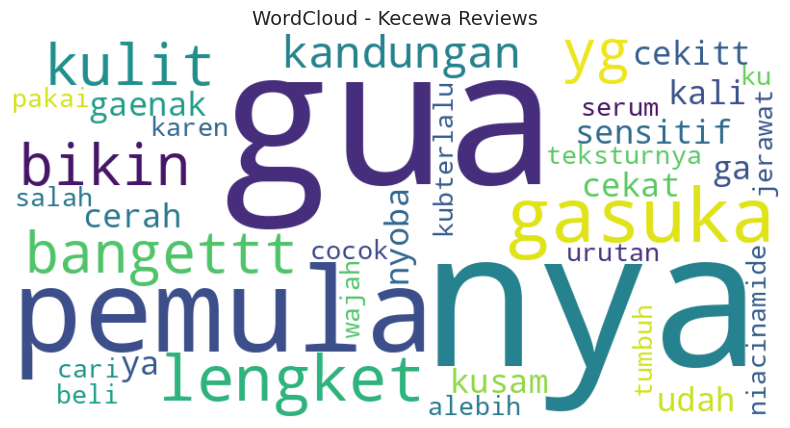

In [ ]:
# Generate and display WordCloud
generate_wordcloud(kecewa_text, "WordCloud - Kecewa Reviews")

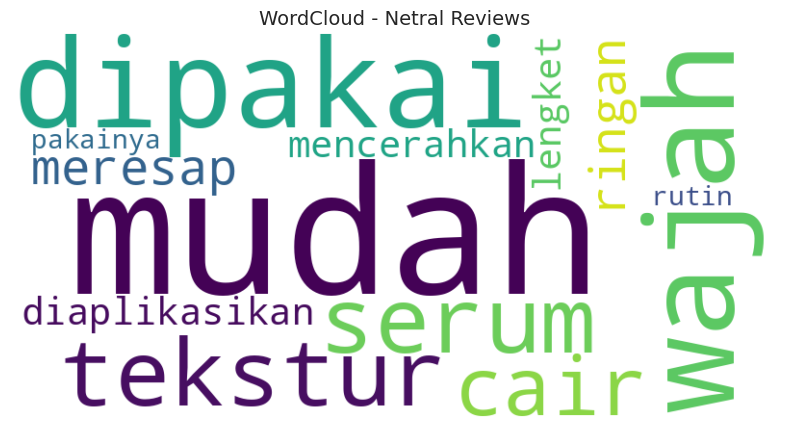

In [ ]:
# Generate and display WordCloud
generate_wordcloud(netral_text, "WordCloud - Netral Reviews")

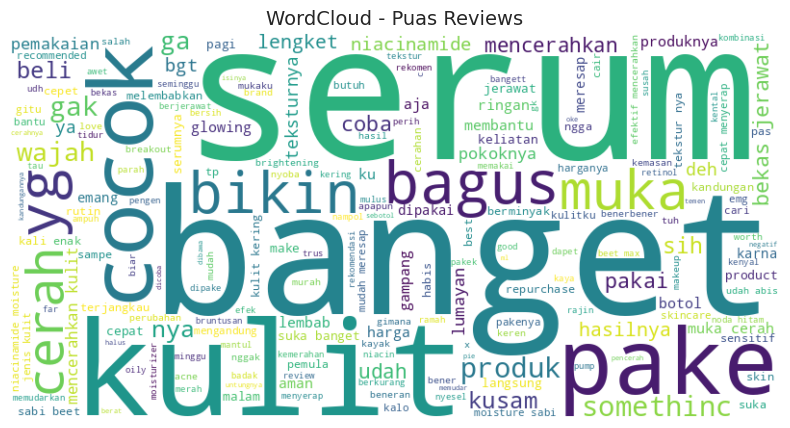

In [ ]:
# Generate and display WordCloud
generate_wordcloud(puas_text, "WordCloud - Puas Reviews")